In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import os
os.environ['OMP_NUM_THREADS'] = '2'

In [151]:
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.hour

In [123]:
data = pd.read_csv('data_project.csv')
data = data.drop(['Unnamed: 0'],axis = 1)
data.head()

,Call_Type,Priority,Block_Address,intersection,add_num,street,street1,street2,alcohol_true_count,top_3_busdesc,top_3_b1_per_sub_type,Date,Time,Hour,INTERPOLATED LONGITUDE AND LATITUDE,TRACT CODE,BLOCK CODE
0,CFS 1182 - Non Injury,Level 3,SHATTUCK AVE & CHANNING WAY,True,0,INT,SHATTUCKAVE,CHANNINGWAY,NaN,NaN,NaN,2023-12-29,20:27:46,20,"-122.26752479699246,37.86580303718421",422901.0,1001.0
1,CFS 1042 - Welfare Check,Level 2,2400 ASHBY AVE,False,2400,ASHBYAVE,NONE,NONE,4.0,"RENTAL PROPERTY, COMMERCIAL RENTAL PROPERTY, P...","Rental of Real Property, Professional SemiProf...",2023-12-29,20:26:14,20,"-122.2671275056839,37.855156782900735",423901.0,1001.0
2,CFS FOUND - Found Property,Level 4,700 PAGE ST,False,700,PAGEST,NONE,NONE,0.0,"ART STUDIO CERAMICS INSTRUCTION, PROPERTY MANA...","Professional SemiProfessional, Rental of Real ...",2023-12-29,20:12:38,20,"-122.30253103597624,37.87591501315046",422000.0,2055.0
3,CFS 20002 - Hit & Run Prop.,Level 3,1800 SOLANO AVE,False,1800,SOLANOAVE,NONE,NONE,20.0,"RESTAURANT, HAIR SALON, COMMERCIAL RENTAL PROP...","Retail Trade, Rental of Real Property, Busines...",2023-12-29,20:05:59,20,"-122.2802355736689,37.89117554587631",421300.0,4000.0
4,CFS 415 - Disturbance,Level 2,1300 DELAWARE ST,False,1300,DELAWAREST,NONE,NONE,0.0,"RENTAL PROPERTY, RESIDENTIAL RENTAL 5 UNITS, R...","Rental of Real Property, Professional SemiProf...",2023-12-29,19:45:10,19,"-122.2868943773318,37.87239569978425",422200.0,2003.0


In [125]:
crime_counts = data.groupby('street').size().reset_index(name='pdcall_count')
crime_counts = crime_counts.sort_values('pdcall_count', ascending=False).reset_index()
crime_counts = crime_counts.drop(['index'],axis = 1)
crime_counts.head(10)

,street,pdcall_count
0,INT,11416
1,SHATTUCKAVE,2690
2,UNIVERSITYAVE,2635
3,SANPABLOAVE,1886
4,TELEGRAPHAVE,1126
5,ALLSTONWAY,1057
6,ASHBYAVE,1035
7,DURANTAVE,985
8,FOURTHST,773
9,ADELINEST,769


In [72]:
data.head()

,Call_Type,Priority,Block_Address,intersection,add_num,street,street1,street2,alcohol_true_count,top_3_busdesc,top_3_b1_per_sub_type,Date,Time,Hour,INTERPOLATED LONGITUDE AND LATITUDE,TRACT CODE,BLOCK CODE
0,CFS 1182 - Non Injury,Level 3,SHATTUCK AVE & CHANNING WAY,True,0,INT,SHATTUCKAVE,CHANNINGWAY,NaN,NaN,NaN,2023-12-29,20:27:46,20,"-122.26752479699246,37.86580303718421",422901.0,1001.0
1,CFS 1042 - Welfare Check,Level 2,2400 ASHBY AVE,False,2400,ASHBYAVE,NONE,NONE,4.0,"RENTAL PROPERTY, COMMERCIAL RENTAL PROPERTY, P...","Rental of Real Property, Professional SemiProf...",2023-12-29,20:26:14,20,"-122.2671275056839,37.855156782900735",423901.0,1001.0
2,CFS FOUND - Found Property,Level 4,700 PAGE ST,False,700,PAGEST,NONE,NONE,0.0,"ART STUDIO CERAMICS INSTRUCTION, PROPERTY MANA...","Professional SemiProfessional, Rental of Real ...",2023-12-29,20:12:38,20,"-122.30253103597624,37.87591501315046",422000.0,2055.0
3,CFS 20002 - Hit & Run Prop.,Level 3,1800 SOLANO AVE,False,1800,SOLANOAVE,NONE,NONE,20.0,"RESTAURANT, HAIR SALON, COMMERCIAL RENTAL PROP...","Retail Trade, Rental of Real Property, Busines...",2023-12-29,20:05:59,20,"-122.2802355736689,37.89117554587631",421300.0,4000.0
4,CFS 415 - Disturbance,Level 2,1300 DELAWARE ST,False,1300,DELAWAREST,NONE,NONE,0.0,"RENTAL PROPERTY, RESIDENTIAL RENTAL 5 UNITS, R...","Rental of Real Property, Professional SemiProf...",2023-12-29,19:45:10,19,"-122.2868943773318,37.87239569978425",422200.0,2003.0


In [127]:
filtered_data = data[data['street'] != 'INT']

street_crime_count = filtered_data.groupby('street').size().reset_index(name='pdcall_count')

street_alcohol_count = filtered_data.groupby('street')['alcohol_true_count'].sum().reset_index()
street_alcohol_crime = pd.merge(street_crime_count, street_alcohol_count, on='street')

correlation = street_alcohol_crime[['pdcall_count', 'alcohol_true_count']].corr()

correlation

,pdcall_count,alcohol_true_count
pdcall_count,1.000000,0.815789
alcohol_true_count,0.815789,1.000000


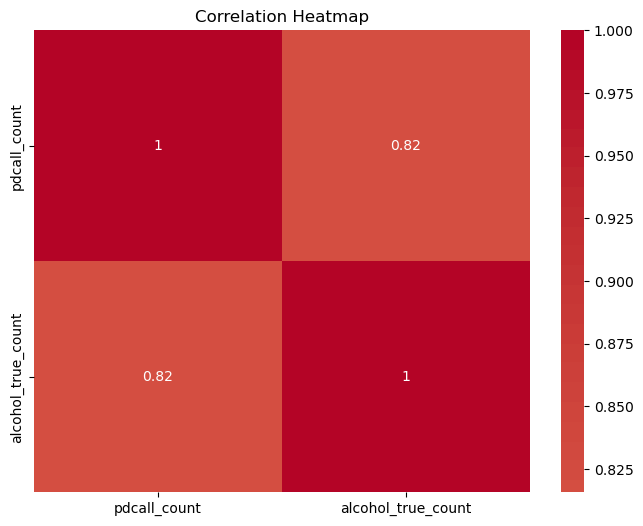

In [129]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\jny71\AppData\Local\Temp\ipykernel_112580\1041133850.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour'] = pd.to_datetime(data['Time']).dt.hour


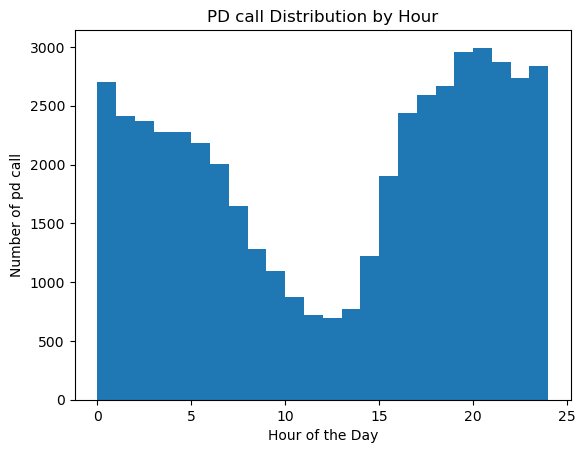

In [131]:
import matplotlib.pyplot as plt

data['Hour'] = pd.to_datetime(data['Time']).dt.hour
plt.hist(data['Hour'], bins=24, range=(0,24))
plt.xlabel('Hour of the Day')
plt.ylabel('Number of pd call')
plt.title('PD call Distribution by Hour')
plt.show()


In [107]:
data.head()

,Call_Type,Priority,Block_Address,intersection,add_num,street,street1,street2,alcohol_true_count,top_3_busdesc,top_3_b1_per_sub_type,Date,Time,Hour,INTERPOLATED LONGITUDE AND LATITUDE,TRACT CODE,BLOCK CODE,longitude,latitude
0,CFS 1182 - Non Injury,Level 3,SHATTUCK AVE & CHANNING WAY,True,0,INT,SHATTUCKAVE,CHANNINGWAY,NaN,NaN,NaN,2023-12-29,20:27:46,20,"-122.26752479699246,37.86580303718421",422901.0,1001.0,-122.267525,37.865803
1,CFS 1042 - Welfare Check,Level 2,2400 ASHBY AVE,False,2400,ASHBYAVE,NONE,NONE,4.0,"RENTAL PROPERTY, COMMERCIAL RENTAL PROPERTY, P...","Rental of Real Property, Professional SemiProf...",2023-12-29,20:26:14,20,"-122.2671275056839,37.855156782900735",423901.0,1001.0,-122.267128,37.855157
2,CFS FOUND - Found Property,Level 4,700 PAGE ST,False,700,PAGEST,NONE,NONE,0.0,"ART STUDIO CERAMICS INSTRUCTION, PROPERTY MANA...","Professional SemiProfessional, Rental of Real ...",2023-12-29,20:12:38,20,"-122.30253103597624,37.87591501315046",422000.0,2055.0,-122.302531,37.875915
3,CFS 20002 - Hit & Run Prop.,Level 3,1800 SOLANO AVE,False,1800,SOLANOAVE,NONE,NONE,20.0,"RESTAURANT, HAIR SALON, COMMERCIAL RENTAL PROP...","Retail Trade, Rental of Real Property, Busines...",2023-12-29,20:05:59,20,"-122.2802355736689,37.89117554587631",421300.0,4000.0,-122.280236,37.891176
4,CFS 415 - Disturbance,Level 2,1300 DELAWARE ST,False,1300,DELAWAREST,NONE,NONE,0.0,"RENTAL PROPERTY, RESIDENTIAL RENTAL 5 UNITS, R...","Rental of Real Property, Professional SemiProf...",2023-12-29,19:45:10,19,"-122.2868943773318,37.87239569978425",422200.0,2003.0,-122.286894,37.872396


In [113]:
data[['longitude', 'latitude']] = data['INTERPOLATED LONGITUDE AND LATITUDE'].str.split(',', expand=True).astype(float)

data = data.dropna(subset=['longitude', 'latitude'])

heat_data = data.groupby(['latitude', 'longitude']).size().reset_index(name='count')
heat_data_list = heat_data[['latitude', 'longitude', 'count']].values.tolist()

m = folium.Map(location=[37.8716, -122.2727], zoom_start=13)

HeatMap(heat_data_list, radius=15, max_zoom=13, gradient={0.2: 'blue', 0.4: 'cyan', 0.6: 'lime', 0.8: 'yellow', 1: 'red'}).add_to(m)

m.save('berkeley_crime_heatmap.html')
m

In [117]:

locations = data[['latitude', 'longitude']].values.tolist()

map_center = [sum([loc[0] for loc in locations]) / len(locations),
              sum([loc[1] for loc in locations]) / len(locations)]

heat_data = [[loc[0], loc[1]] for loc in locations]

m = folium.Map(location=map_center, zoom_start=14)
HeatMap(heat_data, min_opacity=0.2, radius=15, blur=10).add_to(m)

m.save('berkeley_crime_heatmap2.html')

m

In [58]:
import pandas as pd

hourly_crime_counts = data['Hour'].value_counts().sort_index()

hourly_crime_counts_df = hourly_crime_counts.reset_index()
hourly_crime_counts_df.columns = ['Hour', 'Crime_Count']

print(hourly_crime_counts_df)

peak_hour = hourly_crime_counts.idxmax()
peak_count = hourly_crime_counts.max()
print(f"the most pd calls time: {peak_hour}h, count: {peak_count}")


    Hour  Crime_Count
0      0         2699
1      1         2415
2      2         2371
3      3         2273
4      4         2278
5      5         2180
6      6         2005
7      7         1646
8      8         1284
9      9         1093
10    10          872
11    11          722
12    12          694
13    13          774
14    14         1223
15    15         1901
16    16         2436
17    17         2591
18    18         2664
19    19         2960
20    20         2993
21    21         2874
22    22         2735
23    23         2834
the most pd calls time: 20h, count: 2993


In [64]:
crime_by_hour_and_type = data.groupby(['Hour', 'Call_Type']).size().reset_index(name='count')

most_common_crime_by_hour = crime_by_hour_and_type.loc[crime_by_hour_and_type.groupby('Hour')['count'].idxmax()]
most_common_crime_by_hour

,Hour,Call_Type,count
39,0,CFS 415 - Disturbance,217
131,1,CFS 415 - Disturbance,197
222,2,CFS 415 - Disturbance,208
306,3,CFS 415 - Disturbance,216
395,4,CFS 415 - Disturbance,203
485,5,CFS 415E - Noise Disturbance,306
571,6,CFS 415E - Noise Disturbance,353
650,7,CFS 415E - Noise Disturbance,307
724,8,CFS 415E - Noise Disturbance,214
765,9,CFS 1033A - Audible Alarm,173


In [133]:

street_crime_count = data.groupby('street').size().reset_index(name='crime_count')

street_business_type = data.groupby('street')['top_3_busdesc'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'None').reset_index()

street_crime_business = pd.merge(street_crime_count, street_business_type, on='street')

business_type_crime_count = street_crime_business.groupby('top_3_busdesc')['crime_count'].sum().reset_index()

print(business_type_crime_count)


                                         top_3_busdesc  crime_count
0    ACCOUNTING CONSULTING SERVICES, ANIMATION STUD...           53
1    ACCOUNTING CONSULTING SERVICES, HOME OFFICE FO...           19
2    ACUPUNCTURE, RESIDENTIAL RENTAL 4 UNITS, MUSIC...           20
3    ADVERTIZING & MARKETING COMMUNICATION AGENCY, ...            6
4    APPAREL SHIRT PRODUCER, MEMBERSHIP CLUB, R&D C...           45
..                                                 ...          ...
300  WEB SITE DESIGNS & MAINTENANCE, GENERAL CONTRA...            4
301      WHOLESALE COFFEE, RENTAL PROPERTY, CONSULTING           28
302  WRITING COACH & PERSINAL TRANSFORMATION COACH ...           27
303                                       YOGA CLASSES           12
304        YOGA TEACHER, HEALTH & NUTRITION CONSULTANT           25

[305 rows x 2 columns]


In [141]:

priority_weights = {
    'Level 0': 0.1,
    'Level 1': 1.0,
    'Level 2': 0.75,
    'Level 3': 0.5,
    'Level 4': 0.25,
    'Level 5': 0.2,
    'Level 6': 0.15,
    'Level 9': 0.05,
    'Level ': 0.0   
}

data['weighted_crime'] = data['Priority'].map(priority_weights)

data = data.dropna(subset=['weighted_crime'])

street_crime_risk = data.groupby('street')['weighted_crime'].sum().reset_index()
street_crime_risk.columns = ['street', 'crime_risk']

street_crime_risk.head()


,street,crime_risk
0,ACACIAAVE,2.00
1,ACTONCRES,0.75
2,ACTONST,119.85
3,ADAST,10.75
4,ADDISONST,270.60


C:\Users\jny71\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jny71\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


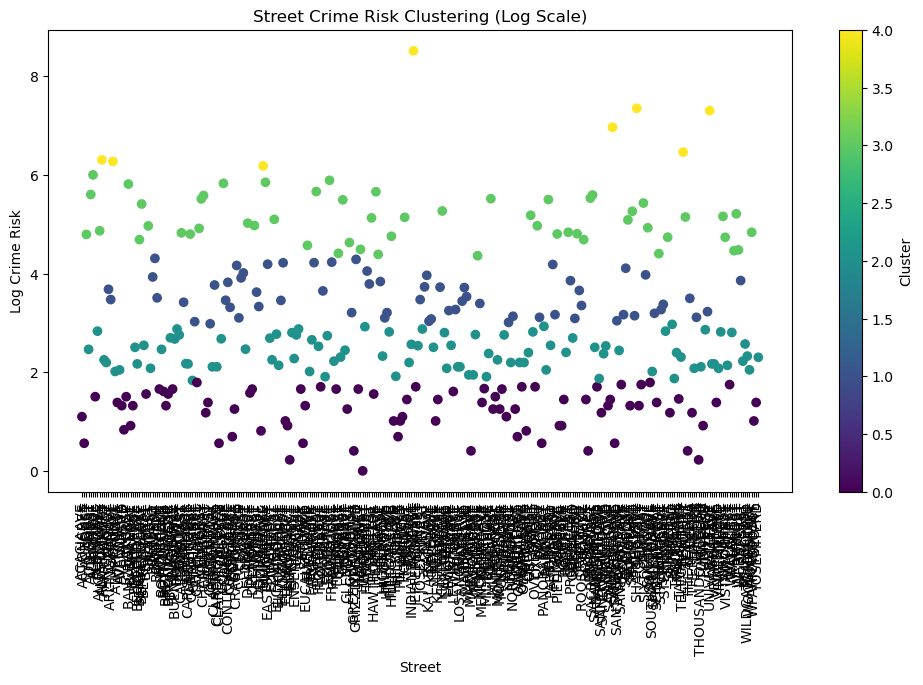

array([[1.21153625],
       [3.5544769 ],
       [2.39410851],
       [5.08715901],
       [6.92157237]])

In [158]:
street_crime_risk_sum = data.groupby('street')['weighted_crime'].sum().reset_index()
street_crime_risk_sum.columns = ['street', 'crime_risk']

X_sum = street_crime_risk_sum[['crime_risk']]

kmeans_sum = KMeans(n_clusters=5, random_state=0).fit(X_sum)

street_crime_risk_sum['cluster'] = kmeans_sum.labels_

street_crime_risk_sum['log_crime_risk'] = np.log1p(street_crime_risk_sum['crime_risk'])

X_log = street_crime_risk_sum[['log_crime_risk']]

kmeans_log = KMeans(n_clusters=5, random_state=0).fit(X_log)

street_crime_risk_sum['log_cluster'] = kmeans_log.labels_

plt.figure(figsize=(12, 6))
plt.scatter(street_crime_risk_sum['street'], street_crime_risk_sum['log_crime_risk'], c=street_crime_risk_sum['log_cluster'], cmap='viridis')
plt.xlabel('Street')
plt.ylabel('Log Crime Risk')
plt.title('Street Crime Risk Clustering (Log Scale)')
plt.colorbar(label='Cluster')
plt.xticks(rotation=90)  
plt.show()


centroids_log = kmeans_log.cluster_centers_
centroids_log


In [164]:

data[['longitude', 'latitude']] = data['INTERPOLATED LONGITUDE AND LATITUDE'].str.split(',', expand=True)
data['latitude'] = data['latitude'].astype(float)
data['longitude'] = data['longitude'].astype(float)
data = data.dropna(subset=['longitude', 'latitude'])
priority_weights = {
    'Level 0': 0.1,
    'Level 1': 1.0,
    'Level 2': 0.75,
    'Level 3': 0.5,
    'Level 4': 0.25,
    'Level 5': 0.2,
    'Level 6': 0.15,
    'Level 9': 0.05,
    'Level ': 0.0   
}

data['weighted_crime'] = data['Priority'].map(priority_weights)
data = data.dropna(subset=['weighted_crime'])
street_crime_risk_sum = data.groupby('street')['weighted_crime'].sum().reset_index()
street_crime_risk_sum.columns = ['street', 'crime_risk']

street_crime_risk_sum['log_crime_risk'] = np.log1p(street_crime_risk_sum['crime_risk'])

from sklearn.cluster import KMeans
X_log = street_crime_risk_sum[['log_crime_risk']]
kmeans_log = KMeans(n_clusters=5, random_state=0).fit(X_log)
street_crime_risk_sum['log_cluster'] = kmeans_log.labels_

street_crime_risk_sum = pd.merge(street_crime_risk_sum, data[['street', 'longitude', 'latitude']], on='street', how='left').drop_duplicates()

street_crime_risk_sum = street_crime_risk_sum.dropna(subset=['latitude', 'longitude'])

colors = ['red', 'blue', 'green', 'purple', 'orange']
street_crime_risk_sum['color'] = street_crime_risk_sum['log_cluster'].map(lambda x: colors[x])

map_berkeley = folium.Map(location=[37.87, -122.27], zoom_start=13)

for idx, row in street_crime_risk_sum.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=row['color'],
        fill=True,
        fill_color=row['color']
    ).add_to(map_berkeley)

map_berkeley.save('map_berkeley_real.html')
map_berkeley

C:\Users\jny71\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [190]:

data['alcohol_true_count'] = data['alcohol_true_count'].fillna(0)

data['intersection'] = data['intersection'].astype(int)

priority_weights = {
    'Level 0': 0.1,
    'Level 1': 1.0,
    'Level 2': 0.75,
    'Level 3': 0.5,
    'Level 4': 0.25,
    'Level 5': 0.2,
    'Level 6': 0.15,
    'Level 9': 0.05,
    'Level ': 0.0  
}

data['weighted_crime'] = data['Priority'].map(priority_weights)
data = data.dropna(subset=['weighted_crime'])
street_crime_risk_sum = data.groupby('street')['weighted_crime'].sum().reset_index()
street_crime_risk_sum.columns = ['street', 'crime_risk']

street_crime_risk_sum['log_crime_risk'] = np.log1p(street_crime_risk_sum['crime_risk'])

from sklearn.cluster import KMeans
X_log = street_crime_risk_sum[['log_crime_risk']]
kmeans_log = KMeans(n_clusters=5, random_state=0).fit(X_log)
street_crime_risk_sum['log_cluster'] = kmeans_log.labels_

street_crime_risk_sum = pd.merge(street_crime_risk_sum, data[['street', 'longitude', 'latitude', 'intersection', 'alcohol_true_count','Hour']], on='street', how='left').drop_duplicates()

street_crime_risk_sum = street_crime_risk_sum.dropna(subset=['latitude', 'longitude'])


C:\Users\jny71\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [192]:
import statsmodels.api as sm

X = street_crime_risk_sum[['intersection', 'alcohol_true_count','Hour']]
y = street_crime_risk_sum['crime_risk']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             crime_risk   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 6.809e+05
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:04:59   Log-Likelihood:            -1.1545e+05
No. Observations:               18538   AIC:                         2.309e+05
Df Residuals:                   18534   BIC:                         2.309e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 99.4313      1

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

street_crime_risk_sum['risk_label'] = (street_crime_risk_sum['crime_risk'] > 50).astype(int)

X = street_crime_risk_sum[['intersection', 'alcohol_true_count']]
y = street_crime_risk_sum['risk_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.53      0.96      0.69       777
           1       0.99      0.78      0.87      2931

    accuracy                           0.82      3708
   macro avg       0.76      0.87      0.78      3708
weighted avg       0.89      0.82      0.83      3708

